# Retroalimentador Hielo Albedo

Por: Claudio Pierard

### $\alpha$ discontinuo

El albedo ya no es constante, se rige por la siguiente función:

$$  \alpha = \left\{
                \begin{array}{ll}
                 0.3 \ , \ if \ T<273.15 \ K,\\
                  0.6 \ , \ \ else.
                \end{array}
              \right.$$
             

Esto se puede integrar al **modelo de orden cero** hecho anteriormente:

### Con $\alpha$ más "suave"

$$\alpha = \left\{
                \begin{array}{ll}
                 0.6 \ ,\ if \ T<263 \ K,\\
                 \\
                 0.6 - \frac{0.3}{15}(T-263) \ , \ if \ 263.15<T<278 \ K,\\ 
                 \\
                  0.3 \ , \ if \ T>278 \ K.
                \end{array}
              \right.$$
              
              
En el intervalo $[263, 278]$, el albedo está definido por:
            
            

$$\alpha  =0.6 - \frac{0.3}{15}(T-263)$$



In [2]:
using PyPlot

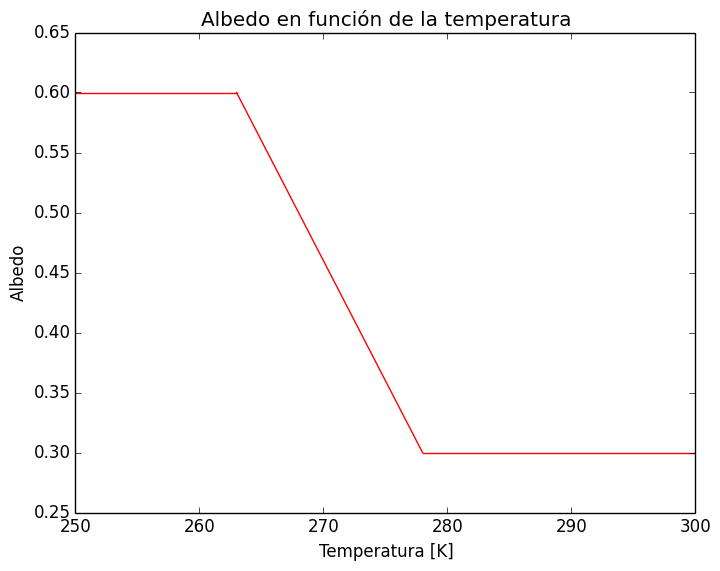

PyObject <matplotlib.text.Text object at 0x31b5fa2d0>

In [11]:
albedo = Any[]
t3 = collect(278:0.5:300)
t2 = collect(263:0.5:278)
t1 = collect(250:0.5:263)

for i in t2
    a = 0.6 - 0.3/15 * (i -263)
    push!(albedo, a)
end

plot(t3, [0.3 for i in t3], "r")
plot(t2, albedo, "r")
plot(t1, [0.6 for i in t1], "r")
xlabel("Temperatura [K]")
ylabel("Albedo")
title("Albedo en función de la temperatura")

La última función de albedo es la que se incorporó al modelo de orden cero.

## Función de modelo de orden cero

se declaran algunas constante que van a ser útiles a lo largo de cuaderno. `Ta` y `Tb` definen un intervalo de temperaturas donde se va a seleccionar una temperatura aleatoria.

In [1]:
δt = 24*3600
γ = 0.0001
Ta = 200  
Tb = 400;

Para la función se necesitan como valores de entrada la emesitividad $\epsilon$, el intervalo de tiempo en días $\delta t$, la toleracia $ \gamma$ (si es requerida), una temperatura inicial T0 y el número de iteraciones se se decide hacer con un `for`.

Para hacer que la función calcule la temperatura de equilibrio por medio de un `while`, usando una temperatura aleatoria simplemente se pone:

````
retroAlimentadorHieloAlbedo(ϵ, δt, γ)
````

Para que corra por un `for`, se tienen que indicar el número de iteraciones `it` y la temperatura inicial `T0`. El valor de $\gamma$ puede ser cualquiera, ya que no se va a ocupar.
````
retroAlimentadorHieloAlbedo(ϵ, δt, 0, 200 , 2000 )
````


In [3]:
function retroAlimentadorHieloAlbedo(ϵ, δt, γ, T0 = Ta + (Tb-Ta)*(rand(1)[1]) , it = 0)
    
    Temp = Any[] 
    
    C_v = 2e8  
    σ = 5.67e-8
    S = 1370
                                   
    diferencia = 1
    
    if it == 0
        
        while diferencia > γ
            
            if T0 < 263
                α = 0.6
            elseif T0 > 278
                α = 0.3
            else
                α = 0.6 - 0.3/15 * (T0 -263)
            end
            
            T_nueva = T0 + δt*((1-α)S/4 -ϵ.*σ.*T0^4)/(C_v)
            push!(Temp, T_nueva)  
            diferencia = abs(T_nueva - T0) 
            T0 = T_nueva  
            
        end
        
    else
        
        for i in 1:it
               
            if T0 < 263
                α = 0.6
            elseif T0 > 278
                α = 0.3
            else
                α = 0.6 - 0.3/15 * (T0 -263)
            end
        
            T_nueva = T0 + δt*((1-α)S/4 -ϵ.*σ.*T0^4)/(C_v)
            push!(Temp, T_nueva)  
            diferencia = abs(T_nueva - T0) 
            T0 = T_nueva  
        end
        
    end
    
    M = [i for i in 1:length(Temp)] 
    plot(M, Temp)
    
    Temp[length(Temp)], length(Temp) 
end

retroAlimentadorHieloAlbedo (generic function with 3 methods)

**Veamos como se comporta para varias temperatura iniciales aleatorias**

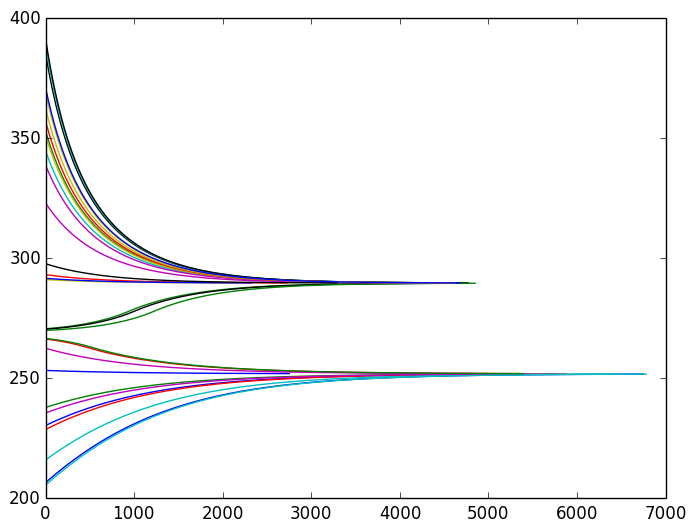

In [12]:
for i in 1:30
    retroAlimentadorHieloAlbedo(0.6, δt, γ)
end

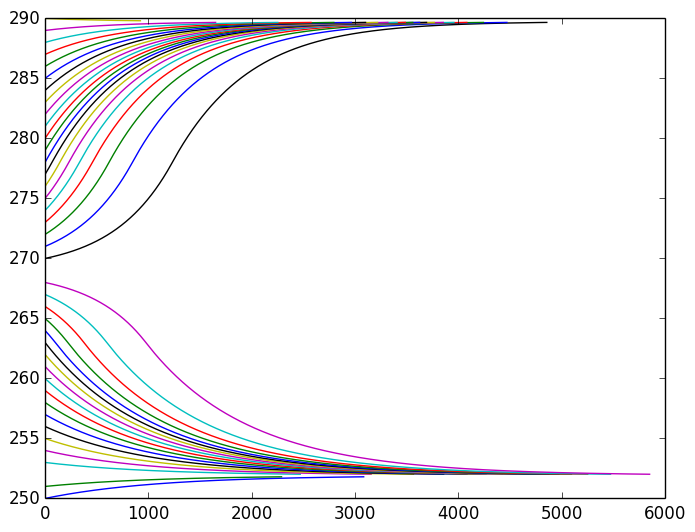

In [13]:
for i in 250:290
    retroAlimentadorHieloAlbedo(0.6, δt, γ, i)
end

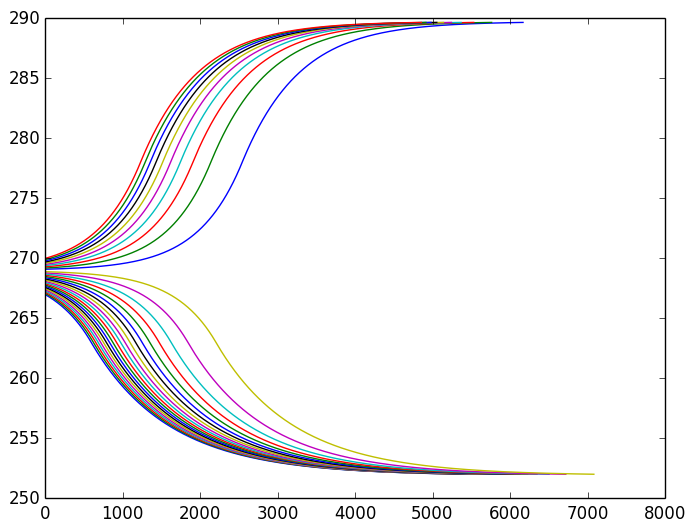

In [14]:
for i in 267:0.1:270
    
    retroAlimentadorHieloAlbedo(0.6, δt, γ, i)
    
end

Se observan dos temperaturas de equilibrio: $251\ K$ y $289\ K$

## Tarea MIT

Para curso **Climate Change Science** https://courses.edx.org/courses/course-v1:MITx+12.340x_2+1T2016/info

Se requería calcular la temperatura de equilibrio, dada un temperatura inicial, usando la función de albedo simple vista al principio de este cuaderno.

In [8]:
function retroAlimentadorHieloAlbedo_simple(ϵ, S, δt, γ, T0 = Ta + (Tb-Ta)*(rand(1)[1]) , it = 0)
    
    Temp = Any[] 
    
    C_v = 2e8  
    σ = 5.67e-8
    #S = 1370
                                   
    diferencia = 1
    
    if it == 0
        
        while diferencia > γ
            
            if T0 < 273.15
                α = 0.6
            else
                α = 0.3
            end
            
            T_nueva = T0 + δt*((1-α)S/4 -ϵ.*σ.*T0^4)/(C_v)
            push!(Temp, T_nueva)  
            diferencia = abs(T_nueva - T0) 
            T0 = T_nueva  
            
        end
        
    else
        
        for i in 1:it
               
            if T0 < 273.15
                α = 0.6
            else
                α = 0.3
            end
        
            T_nueva = T0 + δt*((1-α)S/4 -ϵ.*σ.*T0^4)/(C_v)
            push!(Temp, T_nueva)  
            diferencia = abs(T_nueva - T0) 
            T0 = T_nueva  
        end
        
    end
    
    M = [i for i in 1:length(Temp)] 
    plot(M, Temp)
    
    Temp[length(Temp)], length(Temp) 
end

retroAlimentadorHieloAlbedo_simple (generic function with 3 methods)

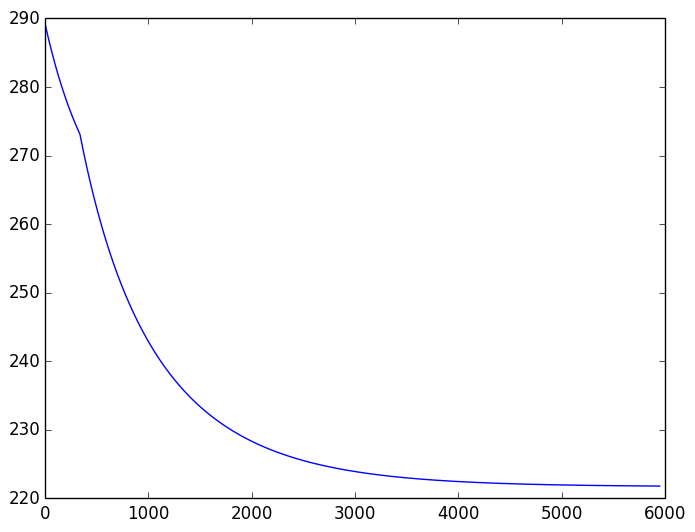

(221.80301178476404,5948)

In [9]:
retroAlimentadorHieloAlbedo_simple(1,1370,δt, γ)
